In [13]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_excel('globalterrorismdb_0522dist.xlsx')
df.head()


eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaT       58   
1  197000000002   1970       0     0        NaN         0        NaT      130   
2  197001000001   1970       1     0        NaN         0        NaT      160   
3  197001000002   1970       1     0        NaN         0        NaT       78   
4  197001000003   1970       1     0        NaN         0        NaT      101   

          country_txt  region                   region_txt provstate  \
0  Dominican Republic       2  Central America & Caribbean  National   
1              Mexico       1                North America   Federal   
2         Philippines       5               Southeast Asia    Tarlac   
3              Greece       8               Western Europe    Attica   
4               Japan       4                    East Asia   Fukouka   

            city   latitude   longitude  specificity  vicinity location  \
0  Santo Domingo  18.456792  -69.951164          1.0         0      NaN   
1    Mexico city  19.371887  -99.086624          1.0         0      NaN   
2        Unknown  15.478598  120.599741          4.0         0      NaN   
3         Athens  37.997490   23.762728          1.0         0      NaN   
4        Fukouka  33.580412  130.396361          1.0         0      NaN   

  summary  crit1  crit2  crit3  doubtterr  alternative alternative_txt  \
0     NaN      1      1      1          0          NaN             NaN   
1     NaN      1      1      1          0          NaN             NaN   
2     NaN      1      1      1          0          NaN             NaN   
3     NaN      1      1      1          0          NaN             NaN   
4     NaN      1      1      1         -9          NaN             NaN   

   multiple  success  suicide  attacktype1                 attacktype1_txt  \
0       0.0        1        0            1                   Assassination   
1       0.0        1        0            6     Hostage Taking (Kidnapping)   
2       0.0        1        0            1                   Assassination   
3       0.0        1        0            3               Bombing/Explosion   
4       0.0        1        0            7  Facility/Infrastructure Attack   

   attacktype2 attacktype2_txt  attacktype3 attacktype3_txt  targtype1  \
0          NaN             NaN          NaN             NaN         14   
1          NaN             NaN          NaN             NaN          7   
2          NaN             NaN          NaN             NaN         10   
3          NaN             NaN          NaN             NaN          7   
4          NaN             NaN          NaN             NaN          7   

                 targtype1_txt  targsubtype1  \
0  Private Citizens & Property          68.0   
1      Government (Diplomatic)          45.0   
2          Journalists & Media          54.0   
3      Government (Diplomatic)          46.0   
4      Government (Diplomatic)          46.0   

                                    targsubtype1_txt  \
0                                     Named Civilian   
1  Diplomatic Personnel (outside of embassy, cons...   
2                    Radio Journalist/Staff/Facility   
3                                  Embassy/Consulate   
4                                  Embassy/Consulate   

                         corp1                  target1  natlty1  \
0                          NaN             Julio Guzman     58.0   
1  Belgian Ambassador Daughter  Nadine Chaval, daughter     21.0   
2             Voice of America                 Employee    217.0   
3                          NaN             U.S. Embassy    217.0   
4                          NaN           U.S. Consulate    217.0   

          natlty1_txt  targtype2 targtype2_txt  targsubtype2 targsubtype2_txt  \
0  Dominican Republic        NaN           NaN           NaN              NaN   
1             Belgium        NaN           NaN           NaN              NaN   


In [8]:
df.shape

(209706, 135)

In [9]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    197017
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       179102
Length: 135, dtype: int64

In [11]:
df.describe()

eventid          iyear         imonth           iday  \
count  2.097060e+05  209706.000000  209706.000000  209706.000000   
mean   2.004867e+11    2004.800993       6.455285      15.527930   
std    1.351933e+09      13.519321       3.387098       8.801104   
min    1.970000e+11    1970.000000       0.000000       0.000000   
25%    1.992080e+11    1992.000000       4.000000       8.000000   
50%    2.012010e+11    2012.000000       6.000000      15.000000   
75%    2.015123e+11    2015.000000       9.000000      23.000000   
max    2.020123e+11    2020.000000      12.000000      31.000000   

            extended        country         region       latitude  \
count  209706.000000  209706.000000  209706.000000  205015.000000   
mean        0.051525     130.291351       7.279854      23.358696   
std         0.221066     111.714562       2.905697      18.137061   
min         0.000000       4.000000       1.000000     -53.154613   
25%         0.000000      69.000000       6.000000      11.510046   
50%         0.000000      98.000000       8.000000      31.300213   
75%         0.000000     160.000000      10.000000      34.557022   
max         1.000000    1004.000000      12.000000      74.633553   

           longitude    specificity       vicinity          crit1  \
count  205014.000000  209705.000000  209706.000000  209706.000000   
mean       30.416738       1.468387       0.068854       0.988265   
std        56.113029       0.984958       0.281308       0.107693   
min      -176.176447       1.000000      -9.000000       0.000000   
25%         8.748117       1.000000       0.000000       1.000000   
50%        43.746215       1.000000       0.000000       1.000000   
75%        68.835918       1.000000       0.000000       1.000000   
max       179.366667       5.000000       1.000000       1.000000   

               crit2          crit3      doubtterr   alternative  \
count  209706.000000  209706.000000  209706.000000  35249.000000   
mean        0.993291       0.866246      -0.423593      1.293001   
std         0.081636       0.340389       2.305025      0.733146   
min         0.000000       0.000000      -9.000000      1.000000   
25%         1.000000       1.000000       0.000000      1.000000   
50%         1.000000       1.000000       0.000000      1.000000   
75%         1.000000       1.000000       0.000000      1.000000   
max         1.000000       1.000000       1.000000      5.000000   

            multiple        success        suicide    attacktype1  \
count  209705.000000  209706.000000  209706.000000  209706.000000   
mean        0.145900       0.883628       0.035469       3.351311   
std         0.353007       0.320672       0.184962       2.029153   
min         0.000000       0.000000       0.000000       1.000000   
25%         0.000000       1.000000       0.000000       2.000000   
50%         0.000000       1.000000       0.000000       3.000000   
75%         0.000000       1.000000       0.000000       3.000000   
max         1.000000       1.000000       1.000000       9.000000   

       attacktype2  attacktype3      targtype1   targsubtype1        natlty1  \
count  8434.000000   658.000000  209706.000000  197867.000000  207692.000000   
mean      3.956011     5.705167       8.484078      47.163034     127.079035   
std       2.358046     2.089622       6.602032      30.599430      91.732261   
min       1.000000     1.000000       1.000000       1.000000       4.000000   
25%       2.000000     5.250000       3.000000      22.000000      78.000000   
50%       2.000000     7.000000       4.000000      35.000000     101.000000   
75%       7.000000     7.000000      14.000000      74.000000     175.000000   
max       9.000000     7.000000      22.000000     113.000000    1004.000000   

          targtype2  targsubtype2       natlty2    targtype3  targsubtype3  \
count  14535.000000  14003.000000  14211.000000  1629.000000   1539.000000   
mean      10.050705     54.641720    126.19

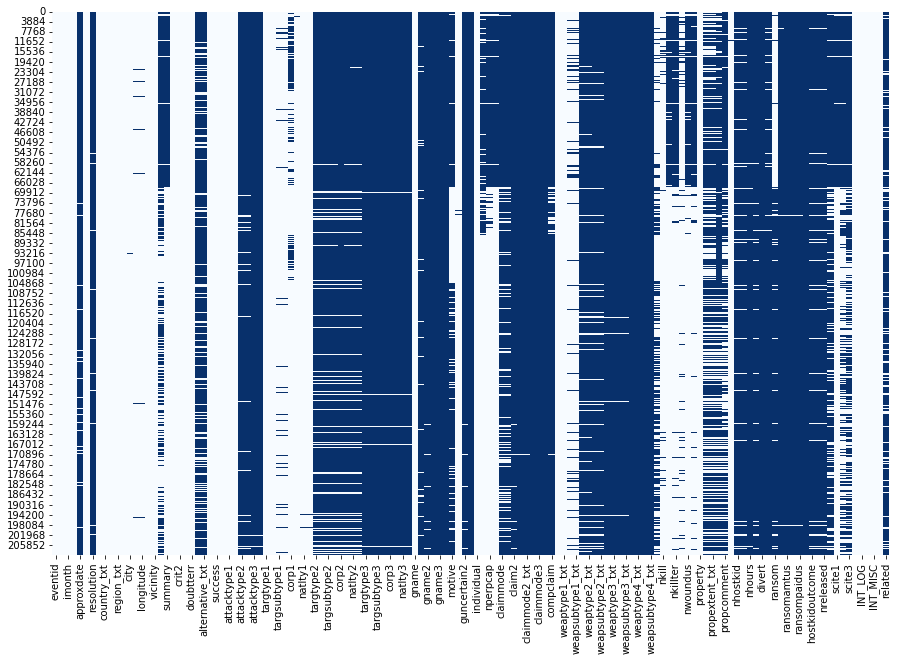

In [15]:
missing_values = df.isnull()
plt.figure(figsize=(15,10))  # Set the size of the heatmap
sns.heatmap(missing_values, cbar=False,cmap='Blues')
plt.show()

In [16]:
# Selecting numerical columns, adjust according to your dataset
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df_numerical = df[numerical_cols]


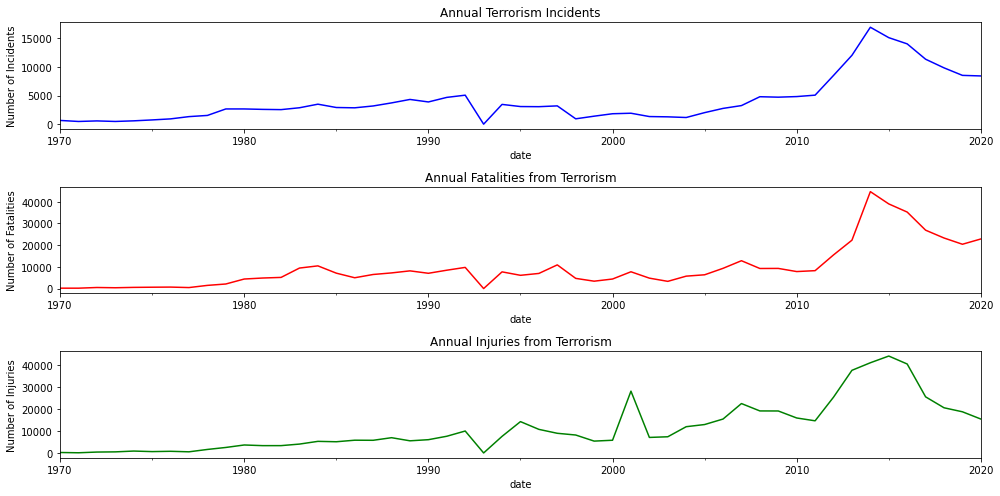

In [31]:
# Load the dataset
df = pd.read_excel('globalterrorismdb_0522dist.xlsx', usecols=['iyear', 'imonth', 'iday', 'nkill', 'nwound', 'country_txt', 'region_txt'])

# Replace zero months and days with one to avoid creating invalid dates
df['imonth'] = df['imonth'].replace(0, 1)
df['iday'] = df['iday'].replace(0, 1)

# Create a 'date' column by combining 'iyear', 'imonth', and 'iday'
# 'errors=coerce' will force any invalid dates to NaT, which we can then drop
df['date'] = df['date'] = pd.to_datetime({
    'year': df['iyear'], 
    'month': df['imonth'], 
    'day': df['iday']
}, errors='coerce')

# Drop rows with NaT in the 'date' column
df.dropna(subset=['date'], inplace=True)

# Set the 'date' column as the index of the dataframe
df.set_index('date', inplace=True)

# Now that we have a proper DatetimeIndex, we can resample and plot our data
# Resample the data to get yearly counts of incidents
annual_frequency = df.resample('Y').size()

# Calculate yearly fatalities and injuries
annual_fatalities = df.resample('Y')['nkill'].sum()
annual_injuries = df.resample('Y')['nwound'].sum()

# Plotting the time series analysis of frequency, fatalities, and injuries
plt.figure(figsize=(14, 7))

plt.subplot(3, 1, 1)
annual_frequency.plot(title='Annual Terrorism Incidents', color='blue')
plt.ylabel('Number of Incidents')

plt.subplot(3, 1, 2)
annual_fatalities.plot(title='Annual Fatalities from Terrorism', color='red')
plt.ylabel('Number of Fatalities')

plt.subplot(3, 1, 3)
annual_injuries.plot(title='Annual Injuries from Terrorism', color='green')
plt.ylabel('Number of Injuries')

plt.tight_layout()
plt.show()


In [34]:
!pip install geopandas folium



     |████████████████████████████████| 1.1MB 5.8MB/s eta 0:00:01
     |████████████████████████████████| 102kB 9.8MB/s eta 0:00:01
     |████████████████████████████████| 6.2MB 1.7MB/s eta 0:00:01
     |████████████████████████████████| 18.5MB 92kB/s  eta 0:00:01     |███████████████████████▋        | 13.6MB 293kB/s eta 0:00:17
     |████████████████████████████████| 1.4MB 15.8MB/s eta 0:00:01
     |████████████████████████████████| 61kB 15.6MB/s eta 0:00:01
     |████████████████████████████████| 102kB 10.1MB/s ta 0:00:01
ERROR: celery 5.1.2 has requirement click<8.0,>=7.0, but you'll have click 8.1.7 which is incompatible.
  Found existing installation: Click 7.0
    Uninstalling Click-7.0:
      Successfully uninstalled Click-7.0
You should consider upgrading via the 'pip install --upgrade pip' command.


In [39]:
import geopandas as gpd
import folium
from folium.plugins import HeatMap
ds = pd.read_excel('globalterrorismdb_0522dist.xlsx')
# Assuming your dataset has 'latitude' and 'longitude' columns
# Replace 'latitude' and 'longitude' with the actual column names
ds_geo = ds.dropna(subset=['latitude', 'longitude'])

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(ds_geo, geometry=gpd.points_from_xy(ds_geo.longitude, ds_geo.latitude))

# Basic Folium Map
m = folium.Map([0, 0], zoom_start=2)

# Add HeatMap
heat_data = [[point.xy[1][0], point.xy[0][0]] for point in gdf.geometry ]
HeatMap(heat_data).add_to(m)

# Save to HTML file (optional)
m.save('global_terrorism_heatmap.html')

# Display the map
m


In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
df = pd.read_excel('globalterrorismdb_0522dist.xlsx')

# For simplicity, let's choose a few features that we think might predict fatalities
# For a real analysis, you would perform feature selection based on more careful consideration
features = ['iyear', 'imonth', 'country_txt', 'attacktype1', 'targtype1', 'weaptype1']
target = 'nkill'

# Handle missing values - this is simplistic, for real analysis you would need a more nuanced approach
df = df[features + [target]].dropna()

# Encode categorical variables
categorical_features = ['country_txt', 'attacktype1', 'targtype1', 'weaptype1']
numeric_features = ['iyear', 'imonth']

# Create the preprocessing pipelines for both numeric and categorical data
#numeric_transformer = Pipeline(steps=[
    #('scaler', StandardScaler())
#])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ], remainder='passthrough')  # The 'remainder' parameter allows us to keep the columns that are not transformed


# Split the dataset into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [43]:
# Create the regression model as part of a pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Train the model
model.fit(X_train, y_train)

# Predict the target on the training and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

print(f'Training RMSE: {train_rmse}')
print(f'Testing RMSE: {test_rmse}')


Training RMSE: 11.679717102855456
Testing RMSE: 8.43697028141806


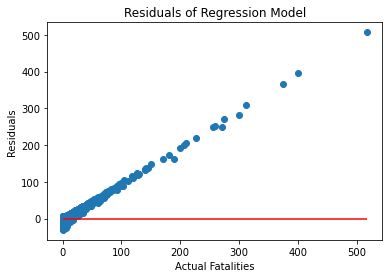

In [44]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_test_pred

# Plot residuals
plt.scatter(y_test, residuals)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='red')
plt.xlabel('Actual Fatalities')
plt.ylabel('Residuals')
plt.title('Residuals of Regression Model')
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/youssefayman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


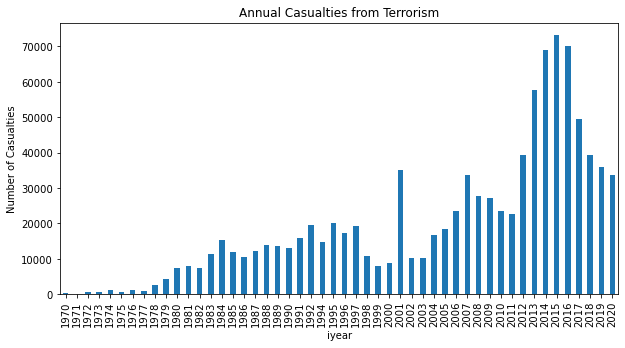

NameError: name 'text' is not defined

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import nltk

# Ensure you have the necessary NLTK data
nltk.download('stopwords')

# Load the dataset (ensure the path is correct and the necessary columns are included)
df = pd.read_excel('globalterrorismdb_0522dist.xlsx', usecols=['iyear','nkill', 'nwound', 'targtype1_txt', 'attacktype1_txt', 'gname', 'summary'])

# Descriptive Statistics for Lethality
df['casualties'] = df['nkill'] + df['nwound']
annual_casualties = df.groupby(df['iyear'])['casualties'].sum()
annual_casualties.plot(kind='bar', figsize=(10, 5), title='Annual Casualties from Terrorism')
plt.ylabel('Number of Casualties')
plt.show()

# Natural Language Processing for Tactics and Targets
# Assuming 'summary' column has textual descriptions of the incidents
stop_words = set(stopwords.words('english'))
vectorizer = CountVectorizer(stop_words=stop_words)
corpus = df['summary'].dropna()
X = vectorizer.fit_transform(corpus)

# Visualize Word Cloud for Tactics and Targets
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Terrorism Tactics and Targets')
plt.show()

# Time-evolving Network Graphs (placeholder for actual network analysis)
# This part would require a specialized library like NetworkX or Pyvis and is not trivially done with a few lines of code.
# The actual network analysis code would go here.

# Analyst Interpretation (cannot be coded; this is a manual task)
# The analyst would interpret the bar charts, word clouds, and network graphs based on their knowledge of historical context and terrorist organizations.

# Notes:
# - The dataset needs to have a 'summary' column with textual descriptions for NLP analysis.
# - The 'casualties' is a calculated field; ensure 'nkill' and 'nwound' are present in the dataset.
# - Network graph analysis is not covered here due to its complexity and would require further information on the connections between data points.


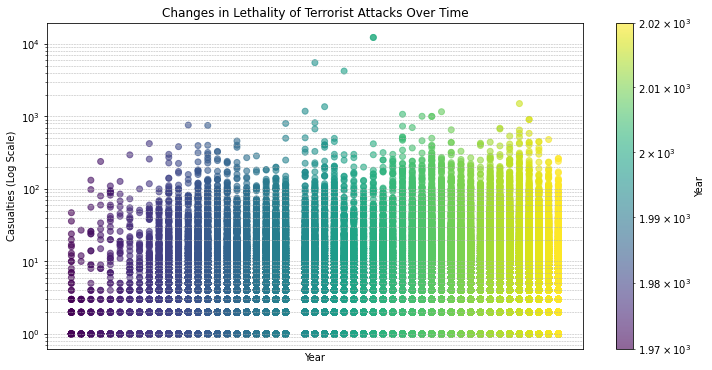

In [58]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd

# Load the dataset
df = pd.read_excel('globalterrorismdb_0522dist.xlsx')

# Combine year, month, and day into a single 'date' column, handling errors
df['date'] = pd.to_datetime({
    'year': df['iyear'],
    'month': df['imonth'],
    'day': df['iday']
}, errors='coerce')

# Create a 'year' column for color mapping
df['year'] = df['date'].dt.year

# Calculate casualties by adding 'nkill' and 'nwound'
df['casualties'] = df['nkill'] + df['nwound']

# Filter out rows with missing or invalid dates or casualties
df = df.dropna(subset=['date', 'casualties'])

# Create a scatter plot with a logarithmic scale for casualties
plt.figure(figsize=(12, 6))
sc = plt.scatter(df['date'].dt.year, df['casualties'], c=df['year'], cmap='viridis', alpha=0.6, norm=mcolors.LogNorm())

# Create a colorbar with a label
plt.colorbar(sc, label='Year')

# Set the y-axis to a logarithmic scale
plt.yscale('log')

# Label the axes and title the plot
plt.xlabel('Year')
plt.ylabel('Casualties (Log Scale)')
plt.title('Changes in Lethality of Terrorist Attacks Over Time')

# Improve the x-axis ticks to only show the years
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))  # Show every 5 years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

# Show grid lines for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Show the plot
plt.show()


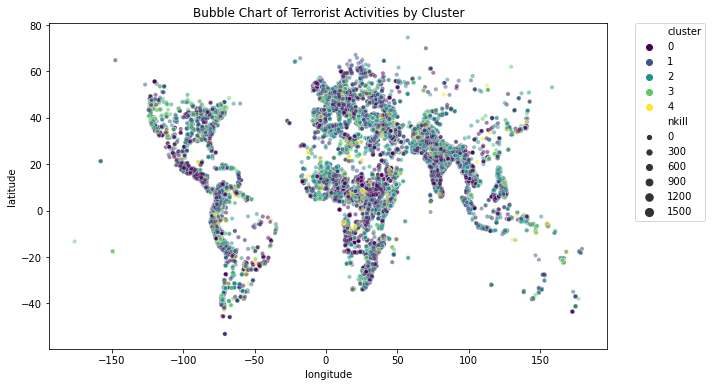

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

# Load the dataset
df = pd.read_excel('globalterrorismdb_0522dist.xlsx')

# Feature Engineering: Create features based on tactics, targets, and geographical focus
# For example, encoding categorical variables and scaling numerical variables
# Assume 'attacktype1', 'targtype1', and 'weaptype1' are categorical features representing tactics, targets, and weapons

df['tactics'] = df['attacktype1']  # This would be more complex in practice
df['targets'] = df['targtype1']    # "
df['weapons'] = df['weaptype1']    # "

# Standardize features for cluster analysis
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['tactics', 'targets', 'weapons']])

# Apply PCA for dimensionality reduction if needed
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(df_pca)

# Visualization: Radar chart for group profiles and bubble chart for scale of activities
# Radar chart for each cluster
# Placeholder for radar chart creation, which requires a custom function
# function create_radar_chart(cluster_data):
#     # code to create radar chart for the cluster_data
#     pass

# Create bubble chart to represent scale of activities against number of incidents
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='longitude', y='latitude', size='nkill', hue='cluster', alpha=0.5, palette='viridis')
plt.title('Bubble Chart of Terrorist Activities by Cluster')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# Human Judgment: Interpret the clustering results and radar charts
# Placeholder for analyst's interpretation and reasoning, which is a manual task
# This part would include the interpretation of the radar charts and bubble chart
# and would link these findings to knowledge about terrorist group ideologies and objectives

# Stopping Condition: Decision on when a satisfactory clustering solution is achieved
# Placeholder for analyst's decision-making process, which is a manual task


In [60]:
df.head()


eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaT       58   
1  197000000002   1970       0     0        NaN         0        NaT      130   
2  197001000001   1970       1     0        NaN         0        NaT      160   
3  197001000002   1970       1     0        NaN         0        NaT       78   
4  197001000003   1970       1     0        NaN         0        NaT      101   

          country_txt  region                   region_txt provstate  \
0  Dominican Republic       2  Central America & Caribbean  National   
1              Mexico       1                North America   Federal   
2         Philippines       5               Southeast Asia    Tarlac   
3              Greece       8               Western Europe    Attica   
4               Japan       4                    East Asia   Fukouka   

            city   latitude   longitude  specificity  vicinity location  \
0  Santo Domingo  18.456792  -69.951164          1.0         0      NaN   
1    Mexico city  19.371887  -99.086624          1.0         0      NaN   
2        Unknown  15.478598  120.599741          4.0         0      NaN   
3         Athens  37.997490   23.762728          1.0         0      NaN   
4        Fukouka  33.580412  130.396361          1.0         0      NaN   

  summary  crit1  crit2  crit3  doubtterr  alternative alternative_txt  \
0     NaN      1      1      1          0          NaN             NaN   
1     NaN      1      1      1          0          NaN             NaN   
2     NaN      1      1      1          0          NaN             NaN   
3     NaN      1      1      1          0          NaN             NaN   
4     NaN      1      1      1         -9          NaN             NaN   

   multiple  success  suicide  attacktype1                 attacktype1_txt  \
0       0.0        1        0            1                   Assassination   
1       0.0        1        0            6     Hostage Taking (Kidnapping)   
2       0.0        1        0            1                   Assassination   
3       0.0        1        0            3               Bombing/Explosion   
4       0.0        1        0            7  Facility/Infrastructure Attack   

   attacktype2 attacktype2_txt  attacktype3 attacktype3_txt  targtype1  \
0          NaN             NaN          NaN             NaN         14   
1          NaN             NaN          NaN             NaN          7   
2          NaN             NaN          NaN             NaN         10   
3          NaN             NaN          NaN             NaN          7   
4          NaN             NaN          NaN             NaN          7   

                 targtype1_txt  targsubtype1  \
0  Private Citizens & Property          68.0   
1      Government (Diplomatic)          45.0   
2          Journalists & Media          54.0   
3      Government (Diplomatic)          46.0   
4      Government (Diplomatic)          46.0   

                                    targsubtype1_txt  \
0                                     Named Civilian   
1  Diplomatic Personnel (outside of embassy, cons...   
2                    Radio Journalist/Staff/Facility   
3                                  Embassy/Consulate   
4                                  Embassy/Consulate   

                         corp1                  target1  natlty1  \
0                          NaN             Julio Guzman     58.0   
1  Belgian Ambassador Daughter  Nadine Chaval, daughter     21.0   
2             Voice of America                 Employee    217.0   
3                          NaN             U.S. Embassy    217.0   
4                          NaN           U.S. Consulate    217.0   

          natlty1_txt  targtype2 targtype2_txt  targsubtype2 targsubtype2_txt  \
0  Dominican Republic        NaN           NaN           NaN              NaN   
1             Belgium        NaN           NaN           NaN              NaN   


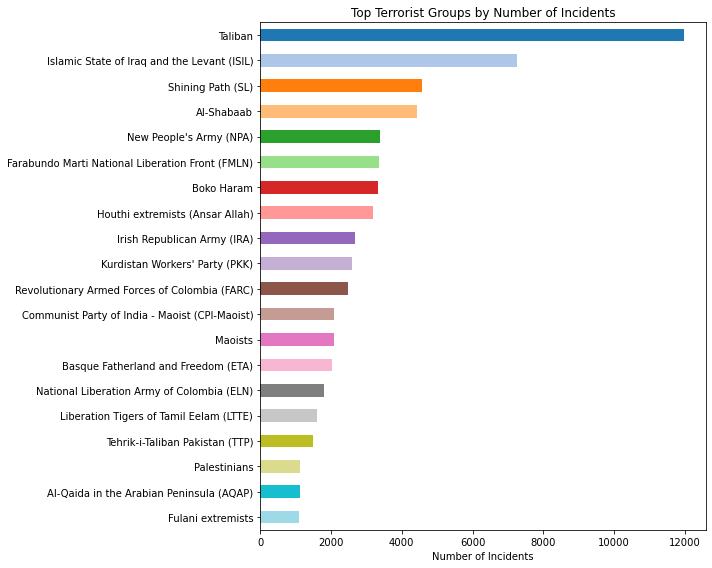

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
# Replace 'path_to_your_data.xlsx' with the actual path to your GTD dataset file
df = pd.read_excel('globalterrorismdb_0522dist.xlsx')

# Assuming 'gname' is the column with the names of the terrorist groups
# Replace 'Unknown' with the actual value used for unknown groups in your dataset
df = df[df['gname'] != 'Unknown']

# Calculate the count of incidents for each group
group_counts = df['gname'].value_counts()

# To assign a unique color to each group, you can use a colormap
# Here, we're using the 'tab20' colormap which provides 20 distinct colors
# If you have more than 20 groups, you might need a different colormap or a custom color set
colors = plt.cm.tab20(range(len(group_counts)))

# Now, let's create the horizontal bar chart without the 'unknown' groups
plt.figure(figsize=(10, 8))
group_counts.head(20).plot(kind='barh', color=colors)  # Displaying the top 20 groups

plt.xlabel('Number of Incidents')
plt.title('Top Terrorist Groups by Number of Incidents')
plt.gca().invert_yaxis()
plt.tight_layout()

# Save the plot if needed
plt.savefig('top_terrorist_groups.png')

plt.show()


In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel('globalterrorismdb_0522dist.xlsx')

# Filter out 'Unknown' groups
df = df[df['gname'] != 'Unknown']

# Check if the DataFrame is empty after filtering
if df.empty:
    raise ValueError("The DataFrame is empty after filtering out 'Unknown' groups.")

# Get the top 20 groups by the number of incidents
top_groups = df['gname'].value_counts().head(20).index

# Filter the dataframe to include only the top groups
df = df[df['gname'].isin(top_groups)]

# Check if the DataFrame is empty after getting the top groups
if df.empty:
    raise ValueError("The DataFrame is empty after filtering for the top groups.")

# Assign a color to each group using a seaborn palette
palette = sns.color_palette('husl', n_colors=len(top_groups))
group_colors = dict(zip(top_groups, palette))

# Create the bubble chart
plt.figure(figsize=(15, 10))
for group in top_groups:
    group_data = df[df['gname'] == group]
    if not group_data.empty:
        plt.scatter(group_data['longitude'], group_data['latitude'], 
                    s=group_data['nkill'] + 10,  # Size of bubble, 10 is to ensure even groups with 0 kills are visible
                    color=group_colors[group], 
                    alpha=0.6, 
                    label=group)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Top 20 Terrorist Groups Activity by Location')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, title='Terrorist Groups')
plt.grid(True)
plt.show()


ValueError: need at least one array to concatenate

<Figure size 1080x720 with 1 Axes>

In [78]:
df['nkill'].describe()


count    58365.000000
mean         3.641772
std         13.794122
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max       1700.000000
Name: nkill, dtype: float64